In [11]:
%load_ext autoreload
%autoreload 2

# Testing of simple lane app

In [42]:
import glob
test_pack = glob.glob('test_images/*')
images = len(test_pack)
print('{0} images to plot'.format(images))

6 images to plot


In [38]:
from simple_detector import read_video

In [40]:
import matplotlib.pyplot as plt

In [27]:
import logging
format_ = '%(asctime) - %(message)s'
logger = logging.getLogger('test')

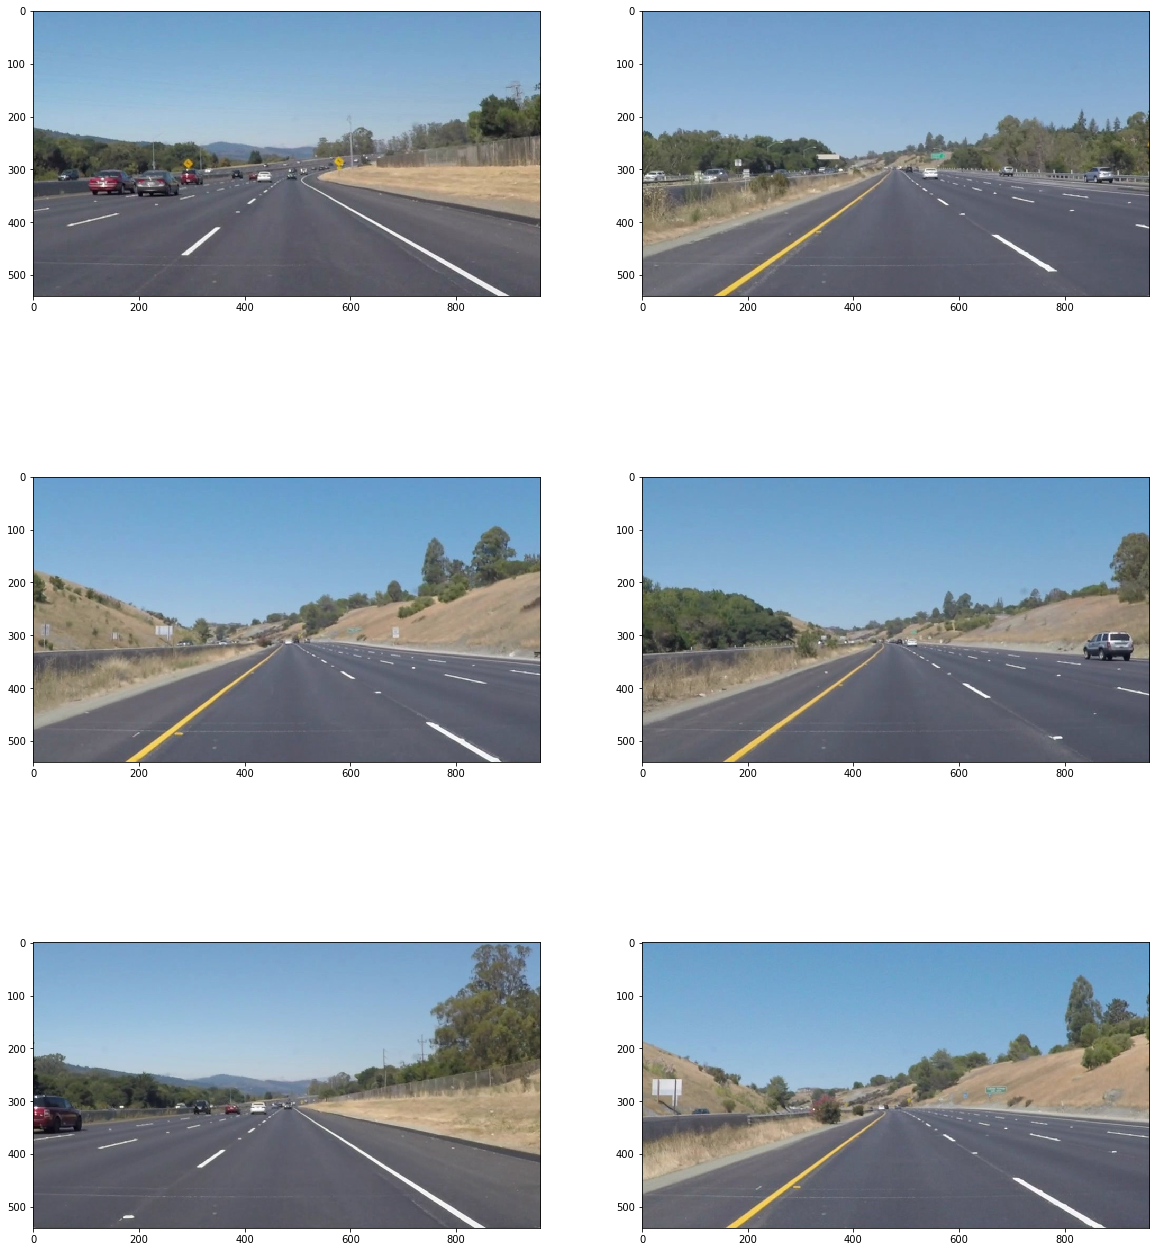

In [71]:
#fig, axarr = plt.subplots(1, images)
#w, h = 40, 30
plt.figure(figsize=(20,50))
for i in range(0, images):
    #result, size = next(read_video(test_pack[i]))
    result, size = next(read_video(test_pack[i]))
    gray = next(grayscale(result))
    plt.subplot(images,2,i+1)
    plt.imshow(result, interpolation='none')

# Build generator pipeline

In [14]:
from simple_detector import *

In [ ]:
#vertices = np.array([[(0.1*image_shape[1],image_shape[0]),
#                          (image_shape[1]*0.95, image_shape[0]), 
#                          (0.55*image_shape[1], 0.6*image_shape[0]), 
#                          (0.45*image_shape[1],0.6*image_shape[0])]], dtype=np.int32)


In [20]:
def draw_pipeline(path: str) -> np.ndarray:
    frame, fr_shape = read_video(path)
    proc_f = grayscale(frame)
    proc_f = gaussian_blur(proc_f, 5)
    proc_f = canny(proc_f, 25, 150)
    roi = region_of_interest(proc_f, np.array([[(0.1*fr_shape[1],fr_shape[0]),
                          (fr_shape[1]*0.95, fr_shape[0]), 
                          (0.55*fr_shape[1], 0.6*fr_shape[0]), 
                          (0.45*fr_shape[1],0.6*fr_shape[0])]], dtype=np.int32))
    proc_f_lines = hough_lines(roi, 2, np.pi/180, 16, 5, 50)
    final_lines = find_lines(proc_f, proc_f_lines)
    output_img = draw_lines(proc_f, final_lines)
    output_img = weighted_img(output_img, frame)
    yield output_img
    

In [66]:
import glob
test_pack = glob.glob('test_images/*')
images = len(test_pack)
print('{0} images to plot'.format(images))
fig = plt.figure(figsize = (1, images))
for i in range(0, images):
    result = draw_pipeline(test_pack[i])
    for image in result:
        fig.add_subplot(images, 1, i+1)
        plt.imshow(result)
plt.show()

6 images to plot


error: OpenCV(4.0.0) /opt/opencv-4.0.0/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


<Figure size 72x432 with 0 Axes>